# Temperature Forecast Project using ML
# Project Description

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

# Attribute Information:

For more information, read [Cho et al, 2020].

1. station - used weather station number: 1 to 25

2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')

3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6

4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9

5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5

6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100

7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5

8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6

9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9

10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4

11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97

12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97

13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98

14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97

15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7

16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6

17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8

18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7

19. lat - Latitude (Â°): 37.456 to 37.645

20. lon - Longitude (Â°): 126.826 to 127.135

21. DEM - Elevation (m): 12.4 to 212.3

22. Slope - Slope (Â°): 0.1 to 5.2

23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9

24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9

25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.


# Importing liabraries

In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [149]:
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Temperature%20Forecast/temperature.csv")

In [150]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [151]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

As station and date are unique and will not contribute to the output so drop them

In [152]:
df1 = df.drop('station', axis=1)
at = df1.drop('Date', axis=1)

In [153]:
at.isnull().sum()

Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [154]:
at.dtypes

Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

To remove the null values, replacing the null values with mean of the columns as the data type is float

In [155]:
at['Present_Tmax']=at['Present_Tmax'].replace('',np.nan)
at['Present_Tmax']=at['Present_Tmax'].fillna(np.mean(at['Present_Tmax']))

In [156]:
at['Present_Tmin']=at['Present_Tmin'].replace('',np.nan)
at['Present_Tmin']=at['Present_Tmin'].fillna(np.mean(at['Present_Tmin']))

at['LDAPS_RHmin']=at['LDAPS_RHmin'].replace('',np.nan)
at['LDAPS_RHmin']=at['LDAPS_RHmin'].fillna(np.mean(at['LDAPS_RHmin']))

at['LDAPS_RHmax']=at['LDAPS_RHmax'].replace('',np.nan)
at['LDAPS_RHmax']=at['LDAPS_RHmax'].fillna(np.mean(at['LDAPS_RHmax']))

at['LDAPS_Tmax_lapse']=at['LDAPS_Tmax_lapse'].replace('',np.nan)
at['LDAPS_Tmax_lapse']=at['LDAPS_Tmax_lapse'].fillna(np.mean(at['LDAPS_Tmax_lapse']))

at['LDAPS_Tmin_lapse']=at['LDAPS_Tmin_lapse'].replace('',np.nan)
at['LDAPS_Tmin_lapse']=at['LDAPS_Tmin_lapse'].fillna(np.mean(at['LDAPS_Tmin_lapse']))

at['LDAPS_WS']=at['LDAPS_WS'].replace('',np.nan)
at['LDAPS_WS']=at['LDAPS_WS'].fillna(np.mean(at['LDAPS_WS']))

at['LDAPS_LH']=at['LDAPS_LH'].replace('',np.nan)
at['LDAPS_LH']=at['LDAPS_LH'].fillna(np.mean(at['LDAPS_LH']))

at['LDAPS_CC1']=at['LDAPS_CC1'].replace('',np.nan)
at['LDAPS_CC1']=at['LDAPS_CC1'].fillna(np.mean(at['LDAPS_CC1']))

at['LDAPS_CC2']=at['LDAPS_CC2'].replace('',np.nan)
at['LDAPS_CC2']=at['LDAPS_CC2'].fillna(np.mean(at['LDAPS_CC2']))

at['LDAPS_CC3']=at['LDAPS_CC3'].replace('',np.nan)
at['LDAPS_CC3']=at['LDAPS_CC3'].fillna(np.mean(at['LDAPS_CC3']))

at['LDAPS_CC4']=at['LDAPS_CC4'].replace('',np.nan)
at['LDAPS_CC4']=at['LDAPS_CC4'].fillna(np.mean(at['LDAPS_CC4']))

at['LDAPS_PPT1']=at['LDAPS_PPT1'].replace('',np.nan)
at['LDAPS_PPT1']=at['LDAPS_PPT1'].fillna(np.mean(at['LDAPS_PPT1']))

at['LDAPS_PPT2']=at['LDAPS_PPT2'].replace('',np.nan)
at['LDAPS_PPT2']=at['LDAPS_PPT2'].fillna(np.mean(at['LDAPS_PPT2']))

at['LDAPS_PPT3']=at['LDAPS_PPT3'].replace('',np.nan)
at['LDAPS_PPT3']=at['LDAPS_PPT3'].fillna(np.mean(at['LDAPS_PPT3']))

at['LDAPS_PPT4']=at['LDAPS_PPT4'].replace('',np.nan)
at['LDAPS_PPT4']=at['LDAPS_PPT4'].fillna(np.mean(at['LDAPS_PPT4']))

at['Next_Tmax']=at['Next_Tmax'].replace('',np.nan)
at['Next_Tmax']=at['Next_Tmax'].fillna(np.mean(at['Next_Tmax']))

at['Next_Tmin']=at['Next_Tmin'].replace('',np.nan)
at['Next_Tmin']=at['Next_Tmin'].fillna(np.mean(at['Next_Tmin']))

In [157]:
at.isnull().sum()

Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

No more null values, we can proceed

# First to Predict Next_tmax: Next day maximum temperature, before proceeding we need to drop the second output variable i.e. Next_Tmin

In [158]:
tm = at.drop('Next_Tmin', axis=1)

In [159]:
tm

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,...,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,...,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,...,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,...,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,...,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,...,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3
7748,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,...,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6
7749,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,...,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8
7750,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4


In [160]:
tm.corr()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
Present_Tmax,1.000000,0.618760,-0.204571,-0.301787,0.570129,0.623496,-0.121820,0.135463,-0.311805,-0.213791,...,-0.109006,-0.099449,-0.120367,-0.099607,-0.052615,0.009020,-0.187121,-0.105809,-0.025439,0.610348
Present_Tmin,0.618760,1.000000,0.123143,-0.015140,0.464151,0.762993,-0.034675,-0.009258,0.084447,0.090263,...,0.112845,0.068176,-0.046126,-0.062965,-0.078475,-0.043461,-0.250275,-0.146339,0.053578,0.471806
LDAPS_RHmin,-0.204571,0.123143,1.000000,0.579141,-0.564580,0.089476,0.294361,-0.070858,0.613818,0.745443,...,0.262665,0.390967,0.240642,0.168595,0.087099,-0.076237,0.102115,0.123744,0.244080,-0.437898
LDAPS_RHmax,-0.301787,-0.015140,0.579141,1.000000,-0.373404,-0.114143,0.135333,0.238579,0.436652,0.391330,...,0.268449,0.229050,0.134607,0.117853,0.195798,0.025667,0.177168,0.219599,0.149261,-0.283738
LDAPS_Tmax_lapse,0.570129,0.464151,-0.564580,-0.373404,1.000000,0.654021,-0.311996,0.048010,-0.438439,-0.523619,...,-0.111065,-0.242122,-0.188115,-0.160273,-0.042093,0.090666,-0.178895,-0.162332,0.047971,0.827189
LDAPS_Tmin_lapse,0.623496,0.762993,0.089476,-0.114143,0.654021,1.000000,-0.130035,-0.134761,0.010901,0.047727,...,0.038056,0.000870,-0.088575,-0.094655,-0.096257,-0.026701,-0.195455,-0.185849,0.159975,0.586983
LDAPS_WS,-0.121820,-0.034675,0.294361,0.135333,-0.311996,-0.130035,1.000000,0.006711,0.289445,0.261090,...,0.152587,0.191886,0.161684,0.144085,0.036657,-0.059466,0.191053,0.171629,0.121759,-0.342729
LDAPS_LH,0.135463,-0.009258,-0.070858,0.238579,0.048010,-0.134761,0.006711,1.000000,-0.147296,-0.264280,...,-0.012542,-0.077545,0.016102,0.019979,0.133221,0.025822,0.055133,0.086781,-0.047384,0.157616
LDAPS_CC1,-0.311805,0.084447,0.613818,0.436652,-0.438439,0.010901,0.289445,-0.147296,1.000000,0.779683,...,0.446328,0.389453,0.168742,0.091722,-0.008131,-0.006843,-0.014090,-0.020752,0.218309,-0.452541
LDAPS_CC2,-0.213791,0.090263,0.745443,0.391330,-0.523619,0.047727,0.261090,-0.264280,0.779683,1.000000,...,0.305975,0.478472,0.240134,0.159548,-0.001497,-0.003581,-0.012823,-0.018073,0.170403,-0.490756


In [161]:
tm.corr()['Next_Tmax'].sort_values(ascending=False)

Next_Tmax           1.000000
LDAPS_Tmax_lapse    0.827189
Present_Tmax        0.610348
LDAPS_Tmin_lapse    0.586983
Present_Tmin        0.471806
LDAPS_LH            0.157616
Solar radiation     0.008795
lon                 0.003052
lat                -0.053510
Slope              -0.102725
LDAPS_PPT1         -0.118817
DEM                -0.172538
LDAPS_PPT2         -0.178383
LDAPS_PPT4         -0.178718
LDAPS_PPT3         -0.194143
LDAPS_RHmax        -0.283738
LDAPS_WS           -0.342729
LDAPS_RHmin        -0.437898
LDAPS_CC4          -0.446319
LDAPS_CC1          -0.452541
LDAPS_CC2          -0.490756
LDAPS_CC3          -0.514680
Name: Next_Tmax, dtype: float64

We see that the major factors contributing to next days maximum temperature are LDAPS_Tmax_lapse Present_Tmax, LDAPS_Tmin_lapse ,Present_Tmin ,LDAPS_LH. On the other hand LDAPS_RHmax,LDAPS_WS ,LDAPS_RHmin ,LDAPS_CC4,LDAPS_CC1,LDAPS_CC2, LDAPS_CC3 are negatively correlated to Next_Tmax

<Axes: >

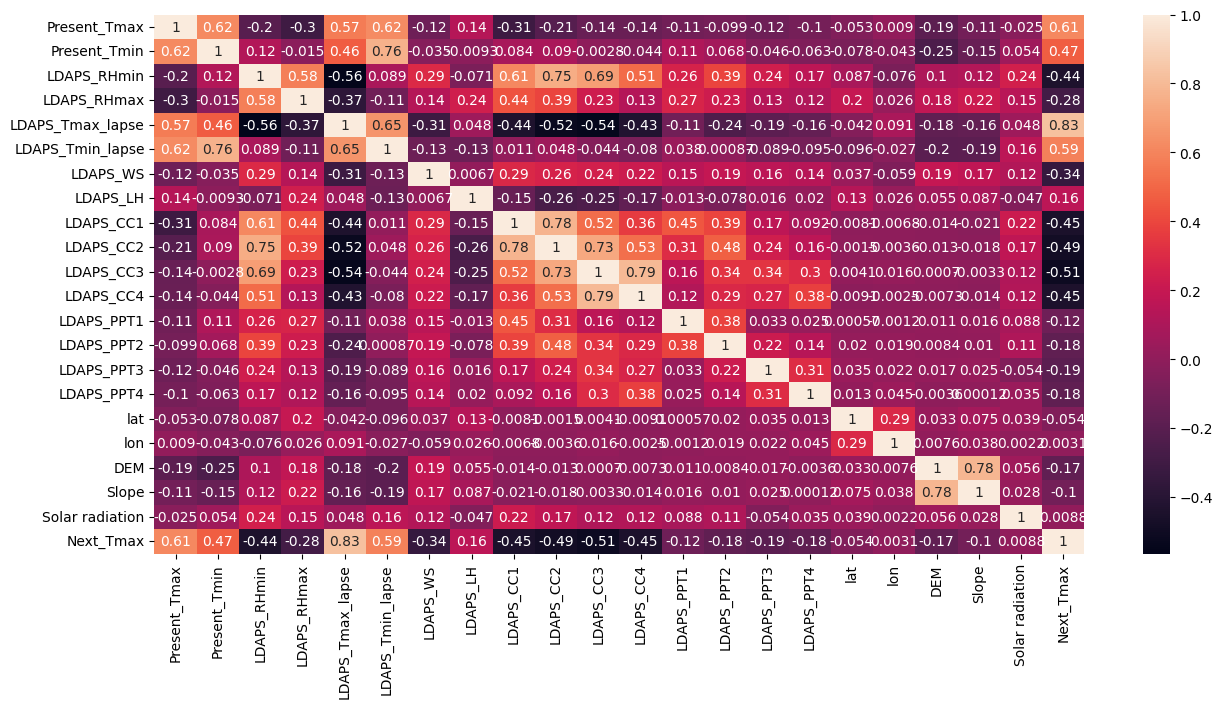

In [162]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(tm.corr(),annot=True)

In [163]:
tm.describe().T

,count,mean,std,min,25%,50%,75%,max
Present_Tmax,7752.0,29.768211,2.956557,20.000000,27.800000,29.900000,32.000000,37.600000
Present_Tmin,7752.0,23.225059,2.403036,11.300000,21.700000,23.400000,24.900000,29.900000
LDAPS_RHmin,7752.0,56.759372,14.596973,19.794666,46.046162,55.313244,67.038254,98.524734
LDAPS_RHmax,7752.0,88.374804,7.157124,58.936283,84.316923,89.699505,93.704500,100.000153
LDAPS_Tmax_lapse,7752.0,29.613447,2.932898,17.624954,27.693091,29.662273,31.683819,38.542255
LDAPS_Tmin_lapse,7752.0,23.512589,2.333973,14.272646,22.114651,23.735942,25.134000,29.619342
LDAPS_WS,7752.0,7.097875,2.173245,2.882580,5.686487,6.563068,8.007471,21.857621
LDAPS_LH,7752.0,62.505019,33.567001,-13.603212,37.532764,57.310630,83.904586,213.414006
LDAPS_CC1,7752.0,0.368774,0.261185,0.000000,0.148321,0.320110,0.571696,0.967277
LDAPS_CC2,7752.0,0.356080,0.256810,0.000000,0.142328,0.315667,0.554963,0.968353


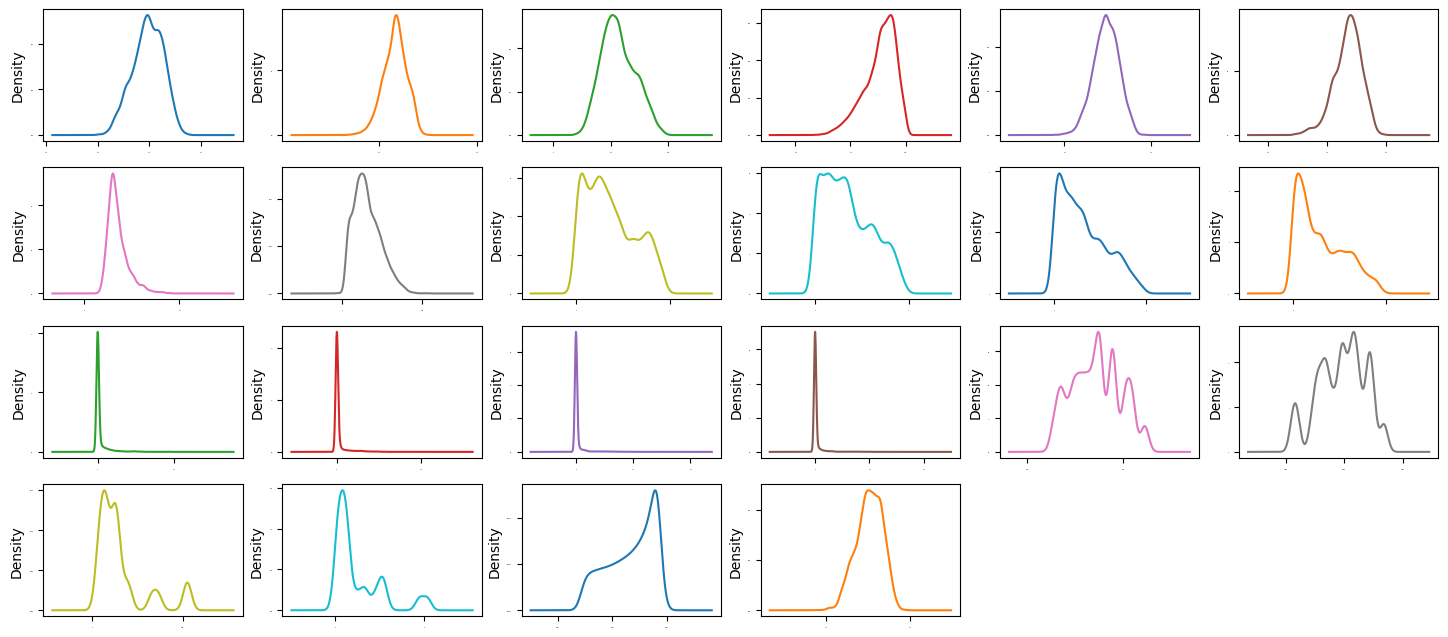

In [164]:
tm.plot(kind='density',subplots=True,layout=(6,6),sharex=False, legend=False, fontsize=1, figsize=(18,12))
plt.show()

# Now seperate dependent and independent variables, x and y.

In [165]:
x = tm.drop('Next_Tmax',axis=1)
y = tm['Next_Tmax']

In [166]:
x.skew().sort_values(ascending = False)

LDAPS_PPT4          6.825464
LDAPS_PPT3          6.457129
LDAPS_PPT2          5.775355
LDAPS_PPT1          5.393821
DEM                 1.723257
LDAPS_WS            1.579236
Slope               1.563020
LDAPS_LH            0.673757
LDAPS_CC4           0.666482
LDAPS_CC3           0.640735
LDAPS_CC2           0.472350
LDAPS_CC1           0.459458
LDAPS_RHmin         0.300220
lat                 0.087062
LDAPS_Tmax_lapse   -0.227880
Present_Tmax       -0.264137
lon                -0.285213
Present_Tmin       -0.367538
Solar radiation    -0.511210
LDAPS_Tmin_lapse   -0.581763
LDAPS_RHmax        -0.855015
dtype: float64

We see that the data is skewed and to bring the skewness in the  range of (-0.5,0.5)using power transform

In [167]:
x.skew().sort_values(ascending=False)

LDAPS_PPT4          6.825464
LDAPS_PPT3          6.457129
LDAPS_PPT2          5.775355
LDAPS_PPT1          5.393821
DEM                 1.723257
LDAPS_WS            1.579236
Slope               1.563020
LDAPS_LH            0.673757
LDAPS_CC4           0.666482
LDAPS_CC3           0.640735
LDAPS_CC2           0.472350
LDAPS_CC1           0.459458
LDAPS_RHmin         0.300220
lat                 0.087062
LDAPS_Tmax_lapse   -0.227880
Present_Tmax       -0.264137
lon                -0.285213
Present_Tmin       -0.367538
Solar radiation    -0.511210
LDAPS_Tmin_lapse   -0.581763
LDAPS_RHmax        -0.855015
dtype: float64

In [168]:
sk = x.skew()
sk[np.abs(sk)>0.25].all()

True

Now we need to check whether outliers are present in the data or not. for that we need to check if the z value of all the factors are exceeding the range(-3,3)

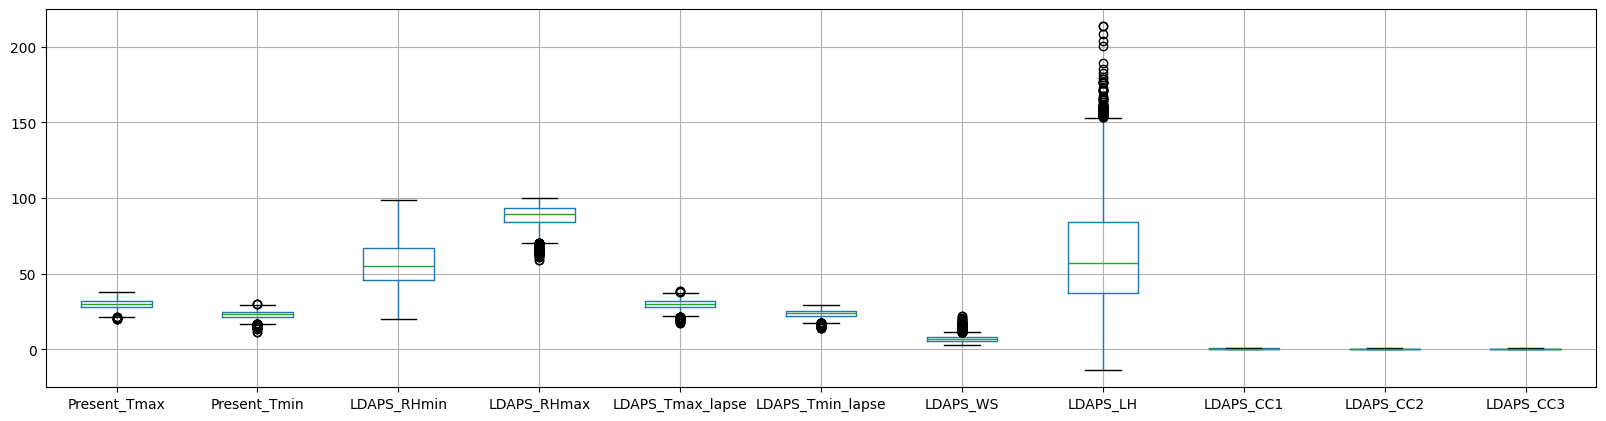

In [169]:
x.iloc[:,0:11].boxplot(figsize=[20,6])
plt.subplots_adjust(bottom=0.25)
plt.show()

As we see there is just one or two in LDAPS_LH, we can ignore it and proceed with modelling as it will not affect the model much

In [170]:
x

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,...,0.130928,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,...,0.127727,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,...,0.142125,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,...,0.134249,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,...,0.170021,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,...,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965
7748,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,...,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535
7749,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,...,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215
7750,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508


In [171]:
y

0       29.1
1       30.5
2       31.1
3       31.7
4       31.2
        ... 
7747    28.3
7748    28.6
7749    27.8
7750    17.4
7751    38.9
Name: Next_Tmax, Length: 7752, dtype: float64

# Model Building

In [172]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
from sklearn.metrics import r2_score

In [173]:
for i in range (0,20):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=i)
    lr.fit(x_train,y_train)
    pred_test = lr.predict(x_test)
    pred_train=lr.predict(x_train)
    print(f"at random state {i}, the training accuracy is :{r2_score(y_train,pred_train)}")
    print(f"at random state {i}, the testing accuracy is :{r2_score(y_test,pred_test)}")
    print('\n')

at random state 0, the training accuracy is :0.7639233031072021
at random state 0, the testing accuracy is :0.7773132191515364


at random state 1, the training accuracy is :0.7646206045114041
at random state 1, the testing accuracy is :0.7747837953628496


at random state 2, the training accuracy is :0.7671473714234137
at random state 2, the testing accuracy is :0.7645126457392762


at random state 3, the training accuracy is :0.7678191906483082
at random state 3, the testing accuracy is :0.7621396901460074


at random state 4, the training accuracy is :0.7632333700288396
at random state 4, the testing accuracy is :0.7800527826728292


at random state 5, the training accuracy is :0.7647939418117975
at random state 5, the testing accuracy is :0.7737311622121643


at random state 6, the training accuracy is :0.7664904197918421
at random state 6, the testing accuracy is :0.7670441614103471


at random state 7, the training accuracy is :0.7679928196326985
at random state 7, the testing ac

As at random state 6, testing and training accuracy is closest.

In [174]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=6)

In [175]:
x_train.shape

(6201, 21)

In [176]:
y_train.shape

(6201,)

In [177]:
x_test.shape

(1551, 21)

In [178]:
y_test.shape

(1551,)

In [179]:
lr.fit(x_train,y_train)

LinearRegression()

In [180]:
pred_test = lr.predict(x_test)
print(r2_score(y_test,pred_test))

0.7670441614103471


# Cross Validation

In [181]:
Train_accuracy = r2_score(y_train,pred_train)
Test_accuracy = r2_score(y_test,pred_test)
from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=i)
    cv_mean = cv_score.mean()
    print(f'At cross fold {i} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing is {Test_accuracy}')
    print('\n')

At cross fold 2 the cv score is 0.6896614217078493 and accuracy score for training is -0.767386138474137 and accuracy score for testing is 0.7670441614103471


At cross fold 3 the cv score is 0.7126060816731207 and accuracy score for training is -0.767386138474137 and accuracy score for testing is 0.7670441614103471


At cross fold 4 the cv score is 0.703069901722996 and accuracy score for training is -0.767386138474137 and accuracy score for testing is 0.7670441614103471


At cross fold 5 the cv score is 0.7015966606259235 and accuracy score for training is -0.767386138474137 and accuracy score for testing is 0.7670441614103471


At cross fold 6 the cv score is 0.7009500636991209 and accuracy score for training is -0.767386138474137 and accuracy score for testing is 0.7670441614103471


At cross fold 7 the cv score is 0.699464101646792 and accuracy score for training is -0.767386138474137 and accuracy score for testing is 0.7670441614103471


At cross fold 8 the cv score is 0.68637761

we can see that At cross fold 3 the cv score is 0.7126060816731207 and accuracy score for training is -0.767386138474137 and accuracy score for testing is 0.7670441614103471 which shows a good model as training and testing accuracy are close enough.

# Plot the Data

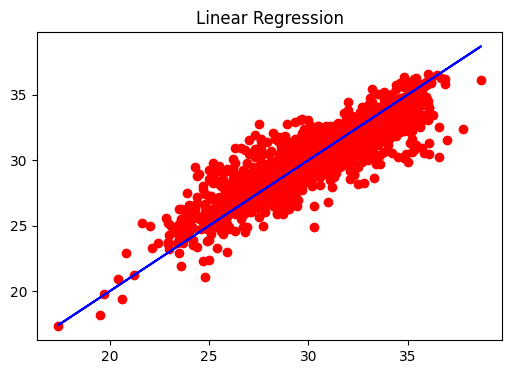

In [182]:
plt.figure(figsize=(6,4))
plt.scatter(x=y_test, y=pred_test, color='r')
plt.plot(y_test,y_test,color='b')
plt.title('Linear Regression')
plt.show()

We see most of our data is in line with the blue line, which shows the quality of data is very good.

In [183]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [184]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls, parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [185]:
ls = Lasso(alpha=0.0001, random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss =r2_score(y_test,pred_ls)
lss

0.7670229811276548

In [186]:
cv_score = cross_val_score(ls,x,y,cv=3)
cv_mean = cv_score.mean()
cv_mean

0.7126094773360325

We see that the model accuracy is 76.7% and the cross validation score is 72.2% which is close to model accuracy this model is not overfitted

# Ensemble Technique:

In [187]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [188]:
parameters = {'criterion':['squared_error', 'friedman_mse', 'poisson', 'absolute_error'],'max_features':['auto','sqrt','log2']}
rf = RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'poisson', 'max_features': 'sqrt'}


In [189]:
rf=RandomForestRegressor(criterion='poisson', max_features = 'log2')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision = rf.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print('R2 score:', rfs*100)

rfscore = cross_val_score(rf,x,y,cv=3)
rfc = rfscore.mean()
print('cross val score:',rfc*100)

R2 score: 90.83683177034936
cross val score: 68.65579980728862


We are getting our model accuracy around 90.22 % and cross validation around 68.77% which shows our model is performing good.

In [190]:
import pickle

In [191]:
filename = 'Temperature_Next_Tmax.pkl'
pickle.dump(rf, open(filename,'wb'))

# Conclusion

In [192]:
loaded_model = pickle.load(open('Temperature_Next_Tmax.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.9083683177034936


In [193]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=['predicted','original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550
predicted,32.495,32.186749,24.782,32.901,31.96,32.535,23.751,33.539,28.679,32.156,...,29.548749,29.835,31.111,25.342,31.877,29.638,28.358,28.402,26.86,32.731
original,32.495,32.186749,24.782,32.901,31.96,32.535,23.751,33.539,28.679,32.156,...,29.548749,29.835,31.111,25.342,31.877,29.638,28.358,28.402,26.86,32.731


In [194]:
tx = at.drop('Next_Tmax',axis=1)
tx

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmin
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,...,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,21.2
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,...,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,22.5
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,...,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,23.9
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,...,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,24.3
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,...,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,...,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,18.1
7748,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,...,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,18.8
7749,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,...,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,17.4
7750,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,11.3


In [195]:
tx.corr()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmin
Present_Tmax,1.000000,0.618760,-0.204571,-0.301787,0.570129,0.623496,-0.121820,0.135463,-0.311805,-0.213791,...,-0.109006,-0.099449,-0.120367,-0.099607,-0.052615,0.009020,-0.187121,-0.105809,-0.025439,0.622741
Present_Tmin,0.618760,1.000000,0.123143,-0.015140,0.464151,0.762993,-0.034675,-0.009258,0.084447,0.090263,...,0.112845,0.068176,-0.046126,-0.062965,-0.078475,-0.043461,-0.250275,-0.146339,0.053578,0.796670
LDAPS_RHmin,-0.204571,0.123143,1.000000,0.579141,-0.564580,0.089476,0.294361,-0.070858,0.613818,0.745443,...,0.262665,0.390967,0.240642,0.168595,0.087099,-0.076237,0.102115,0.123744,0.244080,0.095019
LDAPS_RHmax,-0.301787,-0.015140,0.579141,1.000000,-0.373404,-0.114143,0.135333,0.238579,0.436652,0.391330,...,0.268449,0.229050,0.134607,0.117853,0.195798,0.025667,0.177168,0.219599,0.149261,-0.071997
LDAPS_Tmax_lapse,0.570129,0.464151,-0.564580,-0.373404,1.000000,0.654021,-0.311996,0.048010,-0.438439,-0.523619,...,-0.111065,-0.242122,-0.188115,-0.160273,-0.042093,0.090666,-0.178895,-0.162332,0.047971,0.586868
LDAPS_Tmin_lapse,0.623496,0.762993,0.089476,-0.114143,0.654021,1.000000,-0.130035,-0.134761,0.010901,0.047727,...,0.038056,0.000870,-0.088575,-0.094655,-0.096257,-0.026701,-0.195455,-0.185849,0.159975,0.880176
LDAPS_WS,-0.121820,-0.034675,0.294361,0.135333,-0.311996,-0.130035,1.000000,0.006711,0.289445,0.261090,...,0.152587,0.191886,0.161684,0.144085,0.036657,-0.059466,0.191053,0.171629,0.121759,-0.096576
LDAPS_LH,0.135463,-0.009258,-0.070858,0.238579,0.048010,-0.134761,0.006711,1.000000,-0.147296,-0.264280,...,-0.012542,-0.077545,0.016102,0.019979,0.133221,0.025822,0.055133,0.086781,-0.047384,-0.055440
LDAPS_CC1,-0.311805,0.084447,0.613818,0.436652,-0.438439,0.010901,0.289445,-0.147296,1.000000,0.779683,...,0.446328,0.389453,0.168742,0.091722,-0.008131,-0.006843,-0.014090,-0.020752,0.218309,-0.011028
LDAPS_CC2,-0.213791,0.090263,0.745443,0.391330,-0.523619,0.047727,0.261090,-0.264280,0.779683,1.000000,...,0.305975,0.478472,0.240134,0.159548,-0.001497,-0.003581,-0.012823,-0.018073,0.170403,0.031250


In [196]:
tx.corr()['Next_Tmin'].sort_values(ascending=False)

Next_Tmin           1.000000
LDAPS_Tmin_lapse    0.880176
Present_Tmin        0.796670
Present_Tmax        0.622741
LDAPS_Tmax_lapse    0.586868
Solar radiation     0.120212
LDAPS_RHmin         0.095019
LDAPS_CC2           0.031250
LDAPS_PPT1          0.021323
LDAPS_PPT2         -0.008058
LDAPS_CC1          -0.011028
lon                -0.046603
LDAPS_CC3          -0.054726
LDAPS_LH           -0.055440
LDAPS_PPT3         -0.062622
LDAPS_RHmax        -0.071997
lat                -0.083533
LDAPS_CC4          -0.085093
LDAPS_WS           -0.096576
LDAPS_PPT4         -0.103682
Slope              -0.146882
DEM                -0.246906
Name: Next_Tmin, dtype: float64

<Axes: >

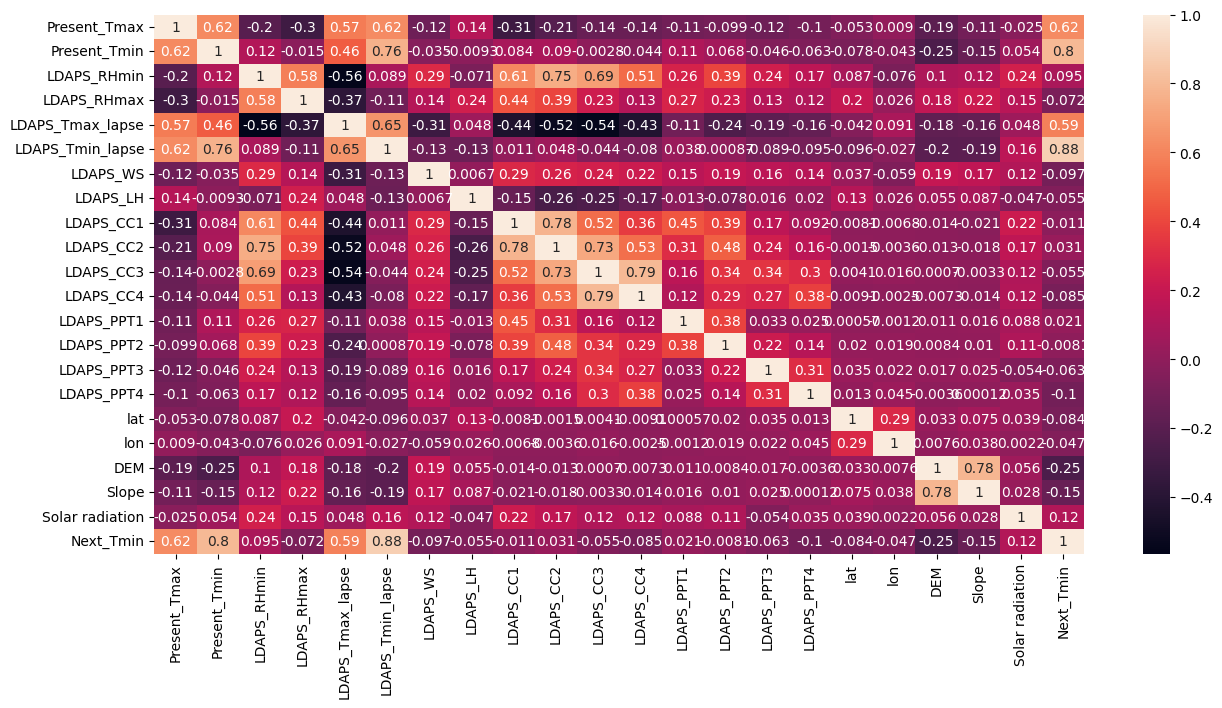

In [197]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(tx.corr(),annot=True)

In [198]:
tx.describe().T

,count,mean,std,min,25%,50%,75%,max
Present_Tmax,7752.0,29.768211,2.956557,20.000000,27.800000,29.900000,32.000000,37.600000
Present_Tmin,7752.0,23.225059,2.403036,11.300000,21.700000,23.400000,24.900000,29.900000
LDAPS_RHmin,7752.0,56.759372,14.596973,19.794666,46.046162,55.313244,67.038254,98.524734
LDAPS_RHmax,7752.0,88.374804,7.157124,58.936283,84.316923,89.699505,93.704500,100.000153
LDAPS_Tmax_lapse,7752.0,29.613447,2.932898,17.624954,27.693091,29.662273,31.683819,38.542255
LDAPS_Tmin_lapse,7752.0,23.512589,2.333973,14.272646,22.114651,23.735942,25.134000,29.619342
LDAPS_WS,7752.0,7.097875,2.173245,2.882580,5.686487,6.563068,8.007471,21.857621
LDAPS_LH,7752.0,62.505019,33.567001,-13.603212,37.532764,57.310630,83.904586,213.414006
LDAPS_CC1,7752.0,0.368774,0.261185,0.000000,0.148321,0.320110,0.571696,0.967277
LDAPS_CC2,7752.0,0.356080,0.256810,0.000000,0.142328,0.315667,0.554963,0.968353


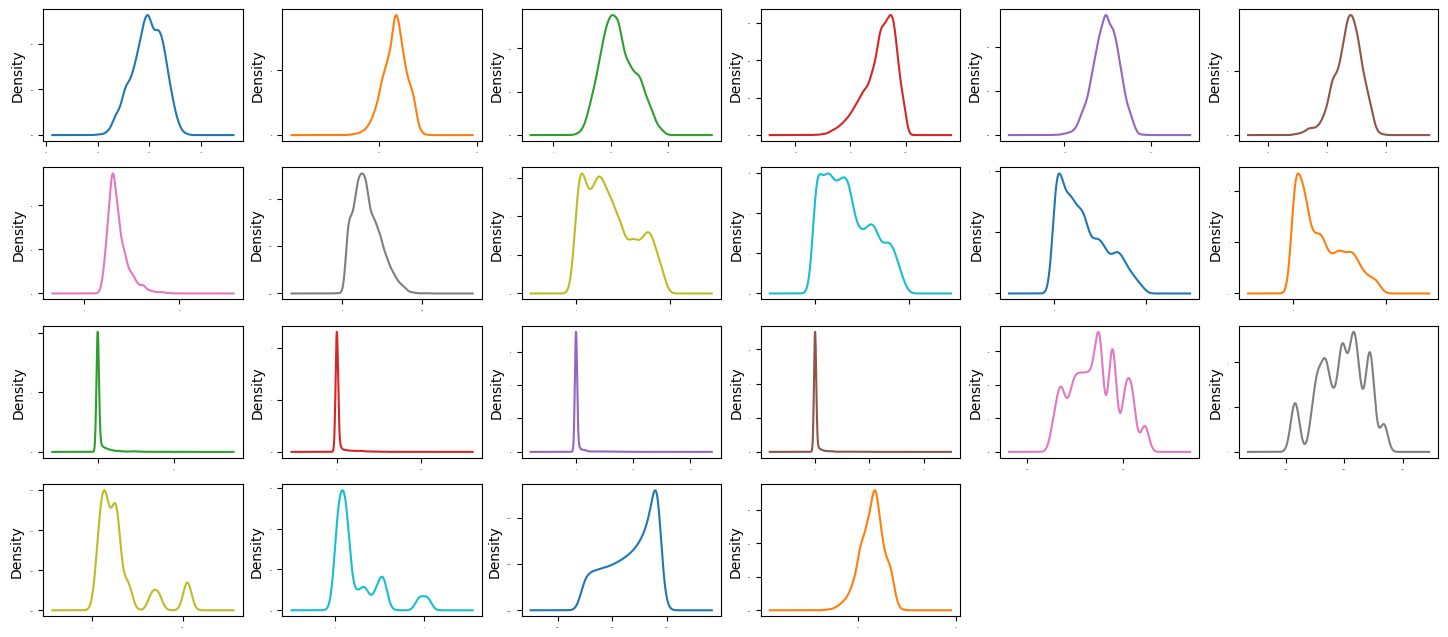

In [199]:
tx.plot(kind='density',subplots = True, layout=(6,6), sharex=False,legend=False, fontsize=1, figsize=(18,12))
plt.show()

# Now to seperate dependent and independent variables, x and y

In [200]:
x=tx.drop('Next_Tmin',axis=1)
y= tx['Next_Tmin']

In [201]:
x.skew().sort_values(ascending=False)

LDAPS_PPT4          6.825464
LDAPS_PPT3          6.457129
LDAPS_PPT2          5.775355
LDAPS_PPT1          5.393821
DEM                 1.723257
LDAPS_WS            1.579236
Slope               1.563020
LDAPS_LH            0.673757
LDAPS_CC4           0.666482
LDAPS_CC3           0.640735
LDAPS_CC2           0.472350
LDAPS_CC1           0.459458
LDAPS_RHmin         0.300220
lat                 0.087062
LDAPS_Tmax_lapse   -0.227880
Present_Tmax       -0.264137
lon                -0.285213
Present_Tmin       -0.367538
Solar radiation    -0.511210
LDAPS_Tmin_lapse   -0.581763
LDAPS_RHmax        -0.855015
dtype: float64

Now we need to check whether outliers are present in the data or not. For that we need to check if the z value of all the factors are exceeding the range (-3,3)

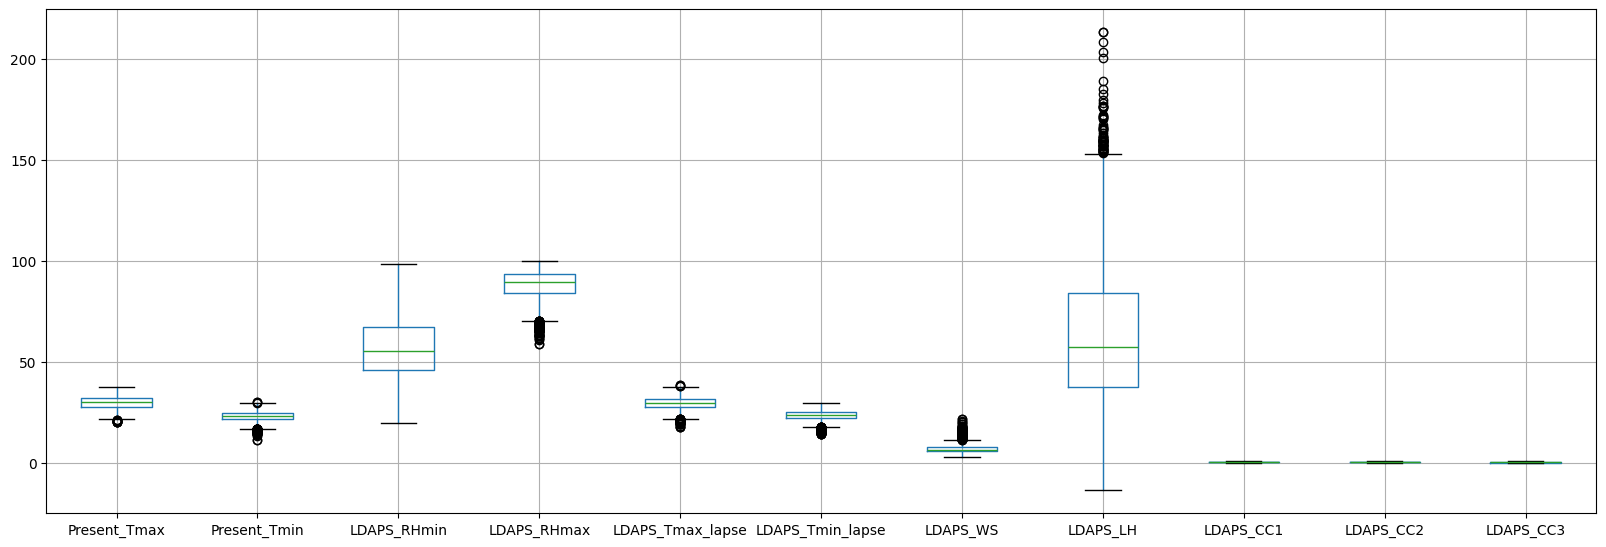

In [202]:
x.iloc[:,0:11].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [203]:
x

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,...,0.130928,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,...,0.127727,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,...,0.142125,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,...,0.134249,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,...,0.170021,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,...,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965
7748,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,...,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535
7749,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,...,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215
7750,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508


In [204]:
y

0       21.2
1       22.5
2       23.9
3       24.3
4       22.5
        ... 
7747    18.1
7748    18.8
7749    17.4
7750    11.3
7751    29.8
Name: Next_Tmin, Length: 7752, dtype: float64

# Model Building

In [205]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
from sklearn.metrics import r2_score

In [206]:
for i in range (0,20):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=i)
    lr.fit(x_train,y_train)
    pred_test = lr.predict(x_test)
    pred_train=lr.predict(x_train)
    print(f"at random state {i}, the training accuracy is :{r2_score(y_train,pred_train)}")
    print(f"at random state {i}, the testing accuracy is :{r2_score(y_test,pred_test)}")
    print('\n')

at random state 0, the training accuracy is :0.8309735611967771
at random state 0, the testing accuracy is :0.826326505839159


at random state 1, the training accuracy is :0.8281435658235067
at random state 1, the testing accuracy is :0.8378410060657817


at random state 2, the training accuracy is :0.8306294806122828
at random state 2, the testing accuracy is :0.827292077987959


at random state 3, the training accuracy is :0.8300356664236117
at random state 3, the testing accuracy is :0.8300031333018564


at random state 4, the training accuracy is :0.8279442811233814
at random state 4, the testing accuracy is :0.838308952093056


at random state 5, the training accuracy is :0.8303410386813621
at random state 5, the testing accuracy is :0.8284382926342959


at random state 6, the training accuracy is :0.8286654459100007
at random state 6, the testing accuracy is :0.8351379372879388


at random state 7, the training accuracy is :0.8279731326286948
at random state 7, the testing accur

As at random state 3, the testing and training accuracy is closest at 83%

In [207]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=3)

In [208]:
x_train.shape

(6201, 21)

In [209]:
y_train.shape

(6201,)

In [210]:
x_test.shape

(1551, 21)

In [211]:
y_test.shape

(1551,)

In [212]:
lr.fit(x_train,y_train)

LinearRegression()

In [213]:
pred_test = lr.predict(x_test)
print(r2_score(y_test,pred_test))

0.8300031333018564


# Cross Validation

In [214]:
Train_accuracy = r2_score(y_train,pred_train)
Test_accuracy = r2_score(y_test,pred_test)
from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=i)
    cv_mean = cv_score.mean()
    print(f'At cross fold {i} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing is {Test_accuracy}')
    print('\n')

At cross fold 2 the cv score is 0.8071702343038879 and accuracy score for training is -0.808527732141372 and accuracy score for testing is 0.8300031333018564


At cross fold 3 the cv score is 0.7790014473609047 and accuracy score for training is -0.808527732141372 and accuracy score for testing is 0.8300031333018564


At cross fold 4 the cv score is 0.7856440851686343 and accuracy score for training is -0.808527732141372 and accuracy score for testing is 0.8300031333018564


At cross fold 5 the cv score is 0.7763293719372198 and accuracy score for training is -0.808527732141372 and accuracy score for testing is 0.8300031333018564


At cross fold 6 the cv score is 0.7627257876901243 and accuracy score for training is -0.808527732141372 and accuracy score for testing is 0.8300031333018564


At cross fold 7 the cv score is 0.7682325659264356 and accuracy score for training is -0.808527732141372 and accuracy score for testing is 0.8300031333018564


At cross fold 8 the cv score is 0.769714

We see at cv=2, the accuracy is highest and the testing accuracy is 80%,training accuracy is 83%, which shows a very good model as training and testing accuracy are equal

# Plot the data

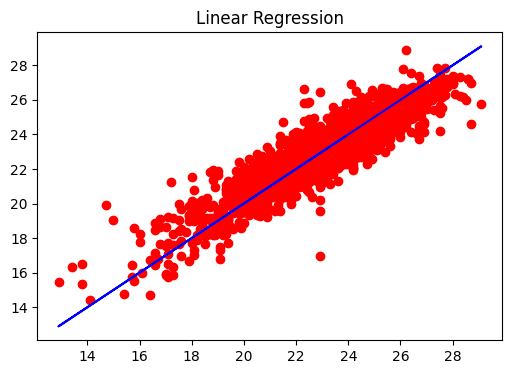

In [215]:
plt.figure(figsize=(6,4))
plt.scatter(x=y_test, y=pred_test, color='r')
plt.plot(y_test,y_test,color='b')
plt.title('Linear Regression')
plt.show()

We see most of our data is in line with the blue line, which shows the quality of data is very good.

In [216]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [217]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls, parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [218]:
ls = Lasso(alpha=0.0001, random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss =r2_score(y_test,pred_ls)
lss

0.8299484112092481

In [219]:
cv_score = cross_val_score(ls,x,y,cv=2)
cv_mean = cv_score.mean()
cv_mean

0.8071800821929036

We see that the model accuracy is 82.9% and the cross validation score is 80.7% which is close to model accuracy this model is not overfitted

# Ensemble Technique

In [220]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [221]:
parameters = {'criterion':['squared_error', 'friedman_mse', 'poisson', 'absolute_error'],'max_features':['auto','sqrt','log2']}
rf = RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'friedman_mse', 'max_features': 'log2'}


In [222]:
rf=RandomForestRegressor(criterion='poisson', max_features = 'log2')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision = rf.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print('R2 score:', rfs*100)

rfscore = cross_val_score(rf,x,y,cv=3)
rfc = rfscore.mean()
print('cross val score:',rfc*100)

R2 score: 90.83091075452103
cross val score: 74.7289071482387


We are getting our model accuracy around 90.77 % and cross validation around 75.03% which shows our model is performing good.

In [223]:
import pickle
filename = 'Temperature_Next_Tmin.pkl'
pickle.dump(rf,open(filename,'wb'))

# Conclusion

In [224]:
loaded_model = pickle.load(open('Temperature_Next_Tmin.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.9083091075452103


In [225]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=['predicted','original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550
predicted,23.448322,21.03,24.79,22.146,24.109,24.797,24.872,20.432,23.420644,23.603,...,24.528,23.888,23.121,24.043322,23.321,23.688,25.311,20.155,16.138,25.823
original,23.448322,21.03,24.79,22.146,24.109,24.797,24.872,20.432,23.420644,23.603,...,24.528,23.888,23.121,24.043322,23.321,23.688,25.311,20.155,16.138,25.823


Here we see that the set of parameters or independent variables used to predict both the next day max temp and next day min temp are same thus we see
that the accuracy of the model is same which shows that it is a very good trained model and is able to predict the temperatures correctly. the accuracy for Next_Tmax is 90.88% and for Next_Tmin is 90.77%. this will help thw forecasters to better predict the temperature.